In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df=pd.read_csv("E:\/application_record.csv")
df2=pd.read_csv("E:\/credit_record.csv")

In [6]:
df.shape

(438557, 18)

In [7]:
df2.shape

(1048575, 3)

In [8]:
df = df.merge(df2, how='inner', on=['ID'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [11]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [12]:
df.shape

(777715, 20)

In [13]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [14]:
# delete col with nan values
df = df.dropna(axis='columns')

In [15]:
#rename cols 
df.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Reality',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'houtp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize'},inplace=True)

In [16]:
# replace M & F ещ 0 & 1 
df['Gender'].replace('M',0,inplace=True)
df['Gender'].replace('F',1,inplace=True)
df['Car'].replace('Y',0,inplace=True)
df['Car'].replace('N',1,inplace=True)
df['Reality'].replace('Y',0,inplace=True)
df['Reality'].replace('N',1,inplace=True)

In [17]:
# check target col values
df['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [18]:
map_status = {'C' : 1,
              'X' : 1,
              '0' : 1,
              '1' : 0,
              '2' : 0,
              '3' : 0,
              '4' : 0,
              '5' : 0}
df["STATUS"] = df['STATUS'].map(map_status)
df['STATUS'] = df['STATUS'].astype(int)

In [19]:
df['STATUS'].value_counts()

1    766140
0     11575
Name: STATUS, dtype: int64

In [20]:
# define the categorical columns
cat_cols = ['inc','edutp', 'inctp','famtp','houtp']

# define a dictionary to map each unique value in the categorical columns to a numerical value
cat_dict = {}
for col in cat_cols:
    cat_dict[col] = {}
    vals = df[col].unique()
    for i, val in enumerate(vals):
        cat_dict[col][val] = i

# label encode the categorical columns
for col in cat_cols:
    df[col] = df[col].apply(lambda x: cat_dict[col][x])

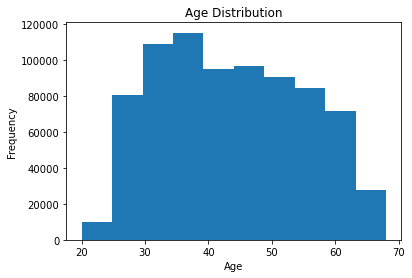

In [21]:
# Create a histogram for the 'Age' column
df['Age']=-(df['DAYS_BIRTH'])//365
plt.hist(df['Age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

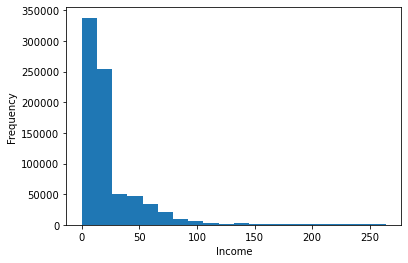

In [22]:
# Plot a histogram of the 'income' column
plt.hist(df['inc'], bins=20)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [23]:
df = df.drop(columns = ['DAYS_BIRTH', 'email', 'wkphone', 'FLAG_MOBIL', 'ChldNo'])

In [24]:
df = df.drop(['ID'],axis=1)

In [25]:
def remove_outliers_zscore(df, threshold):
    mean = np.mean(df)
    std = np.std(df)
    z_scores = np.abs((df - mean) / std)
    data_no_outliers = df[z_scores < threshold]
    return data_no_outliers

In [26]:
def check_outliers(df, data_no_outliers):
    outliers = np.setdiff1d(df, data_no_outliers)
    if outliers.size == 0:
        print("No outliers were removed.")
    else:
        print("The following outliers were removed:")
        print(outliers)

In [27]:
threshold = 2.5
data_no_outliers = remove_outliers_zscore(df, threshold)
check_outliers(df, data_no_outliers)

The following outliers were removed:
[-60. -59. -58. -57. -56. -55. 103. 104. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.
 125. 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138.
 139. 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152.
 153. 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166.
 167. 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.
 195. 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208.
 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222.
 223. 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236.
 237. 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250.
 251. 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264.]


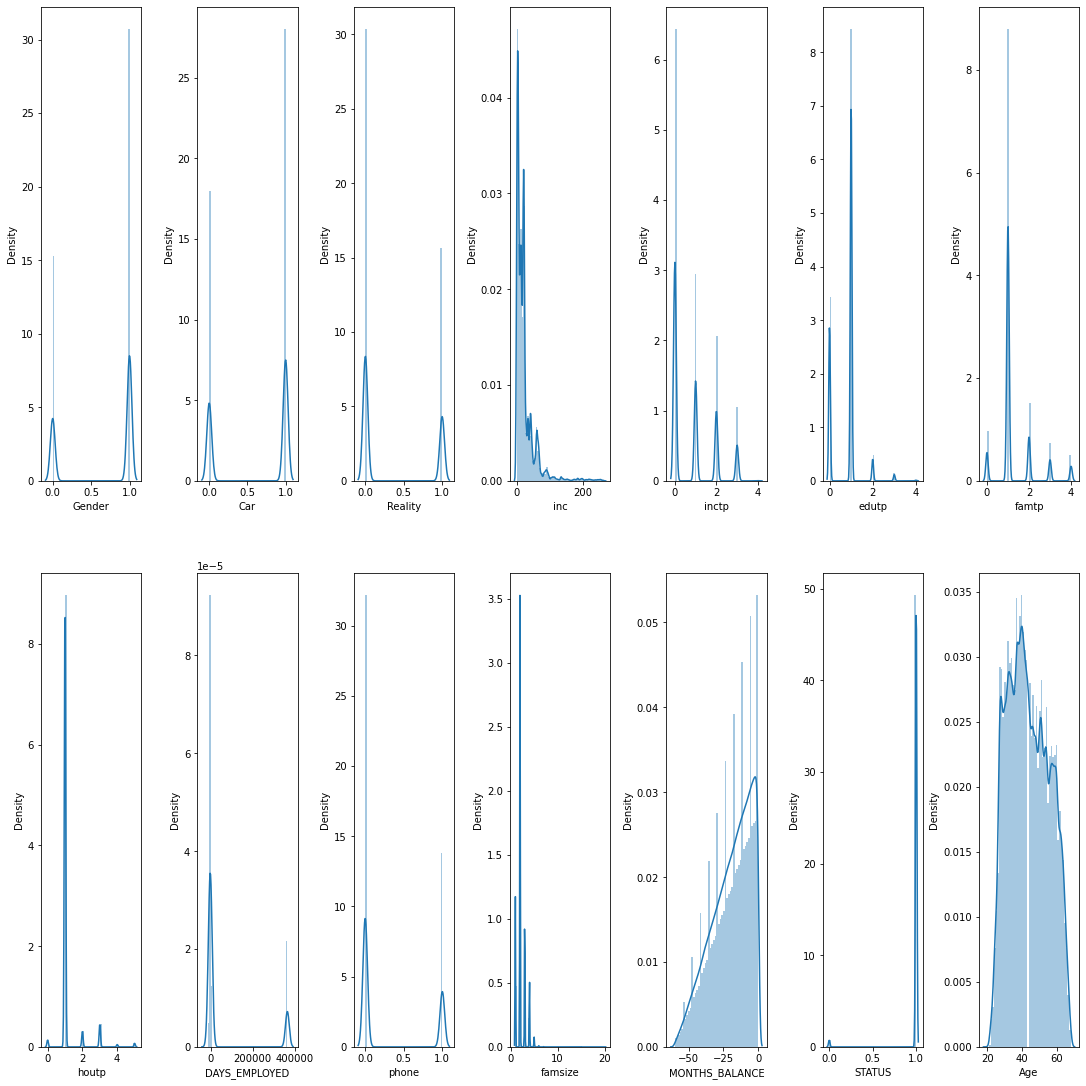

In [28]:
#pairplot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 15))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

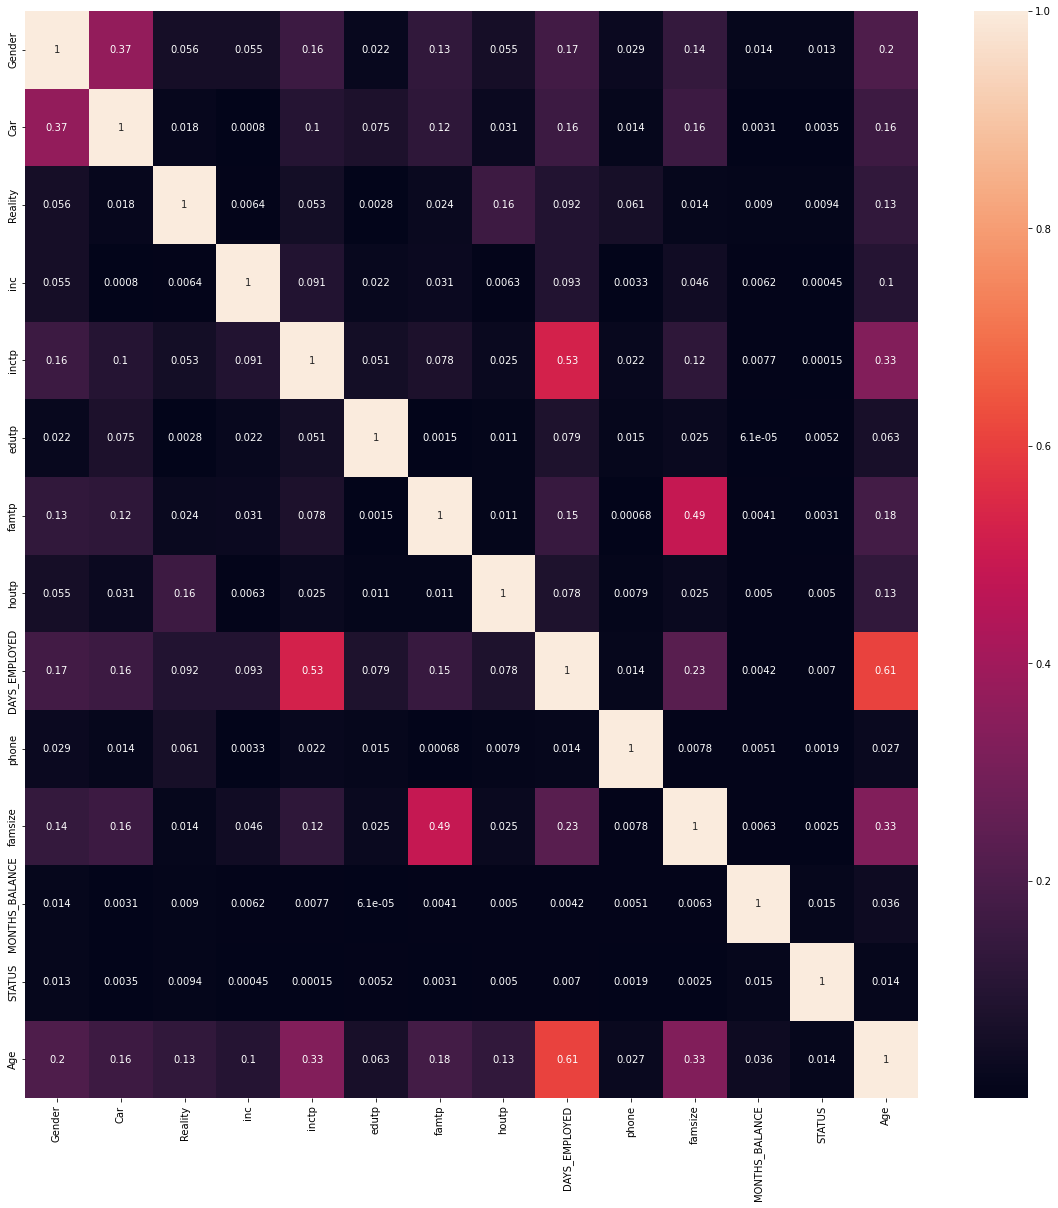

In [29]:
#heatmap plot
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr().abs(),  annot=True)

In [30]:
# Create a correlation matrix
corr_matrix = df.corr().abs()

# Set the threshold to drop highly correlated features
threshold = 0.3

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the highly correlated features from the dataframe
df = df.drop(df[to_drop], axis=1)

# Print the remaining features
print(df.columns)


Index(['Gender', 'Reality', 'inc', 'inctp', 'edutp', 'famtp', 'houtp', 'phone',
       'MONTHS_BALANCE', 'STATUS'],
      dtype='object')


In [31]:
#Cheking the shape of the df after removing the columns
df.shape

(777715, 10)

<AxesSubplot:xlabel='STATUS', ylabel='count'>

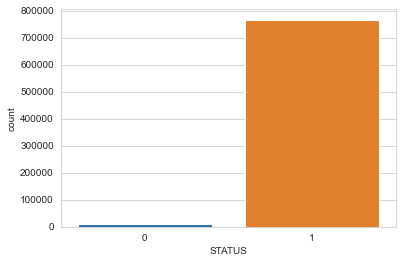

In [32]:
#Count plot
sns.set_style('whitegrid')
sns.countplot(x='STATUS',data=df)

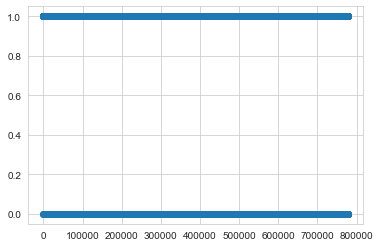

In [33]:
#Scatter plot
plt.scatter(df.index, df['STATUS'])
plt.show()

In [34]:
X = df.drop(['STATUS'], axis=1)
y = df['STATUS']

In [35]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [36]:
# Creating an instance of LogisticRegression model
model = LogisticRegression()

In [37]:
# Fitting the model on training data
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Predicting target values on testing data
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.01560973100858921

In [40]:
# Calculating accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9843902689914108


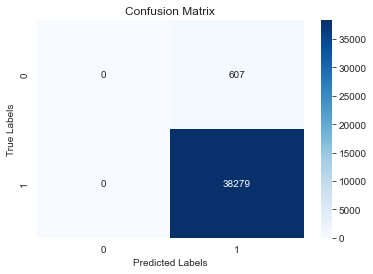

Precision: 0.9843902689914108
Recall: 1.0
F1 Score: 0.9921337393896197


In [41]:
# Calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plotting confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score
# Calculating precision score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculating recall score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculating f1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid for grid search
param_grid = {'C': np.logspace(-4, 4, 20),
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['liblinear', 'saga']}

# Perform grid search with 5-fold cross validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding accuracy score on test set
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score on test set:", grid_search.score(X_test, y_test))